# References

1.https://www.kaggle.com/code/nikhilkohli/stock-prediction-using-linear-regression-starter/notebook

2.https://www.google.com/

3.https://intellipaat.com/blog/what-is-linear-regression/?US

4.https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

5.https://www.analyticsvidhya.com/blog/2021/03/a-practical-tutorial-to-simple-linear-regression-using-python/

6.https://moodle.cestarcollege.com/moodle/mod/assign/view.php?id=1323439

7.https://www.investopedia.com/terms/o/option.asp

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings

#from keras.models import Sequential
#from keras.models import Dense, LSTM

from datetime import datetime
from dateutil.parser import parse

# Data Extraction

In [ ]:
warnings.filterwarnings('ignore')

df = pd.read_csv(r"/content/sample_data/data_download 1Jul2021_to_30Jul2021.csv", index_col='date')
df=df.sort_values('date')
df['date_new']=df.index
df = df.drop(columns=["symbol", "exchange", "option symbol", "style", "*"])
df.head()

,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,date_new
date,,,,,,,,,,,,,,,,,
07/01/2021,430.43,12/15/2023,640.0,P,216.50,211.50,214.000,0.148310,0,0,430.26,-0.931634,0.672488,0.000997,-0.010467,-15.169052,07/01/2021
07/01/2021,430.43,08/02/2021,390.0,P,0.92,0.87,0.895,0.228078,95,423,430.26,-0.068130,0.167521,0.004526,-0.059614,-0.026484,07/01/2021
07/01/2021,430.43,08/02/2021,390.0,C,41.38,40.98,41.180,0.227454,0,0,430.26,0.932381,0.166549,0.004512,-0.060213,0.315605,07/01/2021
07/01/2021,430.43,08/02/2021,389.0,P,0.88,0.84,0.860,0.230561,2,0,430.26,-0.065247,0.162008,0.004329,-0.058282,-0.025366,07/01/2021
07/01/2021,430.43,08/02/2021,389.0,C,42.55,41.90,42.225,0.234778,0,0,430.26,0.931392,0.168427,0.004420,-0.062803,0.314315,07/01/2021


In [ ]:
df.shape

(221046, 17)

In [ ]:
df.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000
mean,435.089149,398.702076,41.667365,40.967420,41.315752,0.234593,405.715661,1660.743542,434.966436,0.102498,0.503011,0.005594,-0.042474,-0.067521
std,3.863763,93.725546,60.504762,59.876656,60.189057,0.225324,5100.355521,6040.663628,3.837734,0.614277,0.544469,0.009183,0.040318,1.726706
min,424.970000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.779877,-15.741297
25%,432.930000,349.000000,1.660000,1.500000,1.600000,0.139646,0.000000,1.000000,432.520000,-0.240680,0.061539,0.000718,-0.056856,-0.143418
50%,435.460000,411.000000,15.910000,15.440000,15.650000,0.206940,0.000000,100.000000,435.440000,-0.000000,0.293737,0.002824,-0.035767,0.000000
75%,438.510000,454.000000,52.550000,51.550000,52.040000,0.306208,19.000000,918.000000,438.140000,0.731058,0.817714,0.006464,-0.014486,0.334990
max,441.020000,655.000000,416.890000,415.230000,416.060000,1.805012,446333.000000,169905.000000,441.050000,1.000000,2.674587,0.185555,0.000000,5.584008


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221046 entries, 07/01/2021 to 07/30/2021
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adjusted close      221046 non-null  float64
 1   expiration          221046 non-null  object 
 2   strike              221046 non-null  float64
 3   call/put            221046 non-null  object 
 4   ask                 221046 non-null  float64
 5   bid                 221046 non-null  float64
 6   mean price          221046 non-null  float64
 7   iv                  221046 non-null  float64
 8   volume              221046 non-null  int64  
 9   open interest       221046 non-null  int64  
 10  stock price for iv  221046 non-null  float64
 11  delta               221046 non-null  float64
 12  vega                221046 non-null  float64
 13  gamma               221046 non-null  float64
 14  theta               221046 non-null  float64
 15  rho                 221046

# Data Validation and Cleaning

In [ ]:
# Check if adjusted close and stock price are same for all rows
print("No of rows with same value for Adjusted close and Stock price: ",df[df['stock price for iv'] == df['adjusted close']].shape[0])
print("Total no of rows: ", df['adjusted close'].shape[0])
# Since more than half of the rows have different values for Adjusted close and Stock price, we cannot drop either.

No of rows with same value for Adjusted close and Stock price:  10764
Total no of rows:  221046


In [ ]:
# Check if any column has null values
df.isnull().sum()

adjusted close        0
expiration            0
strike                0
call/put              0
ask                   0
bid                   0
mean price            0
iv                    0
volume                0
open interest         0
stock price for iv    0
delta                 0
vega                  0
gamma                 0
theta                 0
rho                   0
date_new              0
dtype: int64

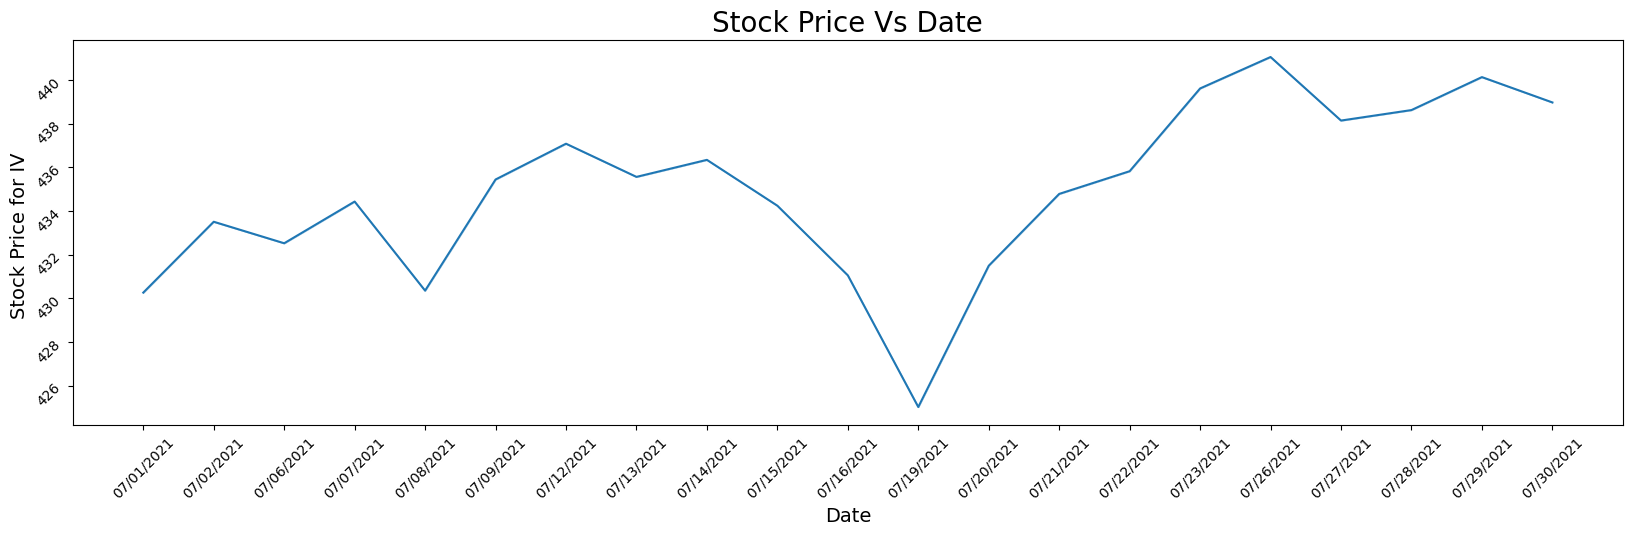

In [ ]:
# TimeSeries to represent Stock Price for IV Vs Time
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=df['date_new'], y=df['stock price for iv'], data=df)

ax.tick_params(rotation=45)

plt.title('Stock Price Vs Date', fontsize=20)
plt.ylabel('Stock Price for IV ', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

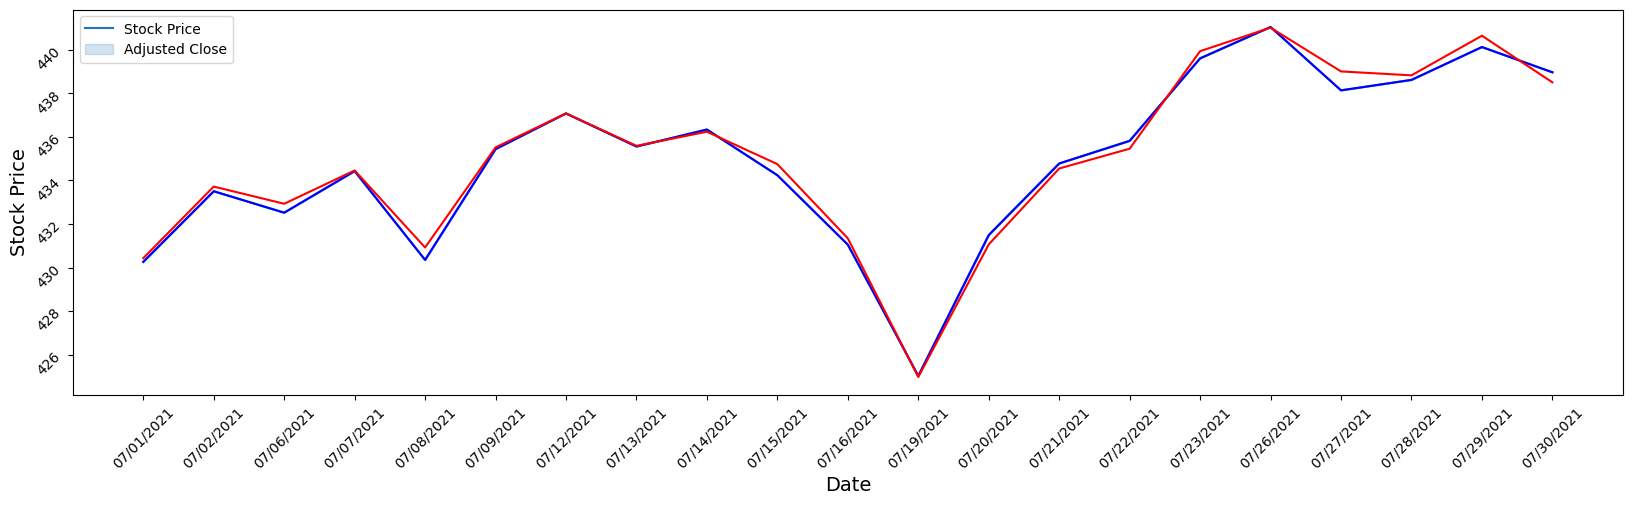

In [ ]:
# Time - Series to represent Stock price and Adjusted Close Price vs Time
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=df['date_new'], y=df['stock price for iv'], data=df)

ax.tick_params(rotation=45)

plt1 = plt.plot(df['date_new'], df['stock price for iv'], color='b')
plt2 = plt.plot(df['date_new'], df['adjusted close'], color='r')
plt.ylabel('Stock Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Stock Price', 'Adjusted Close'])
plt.show()

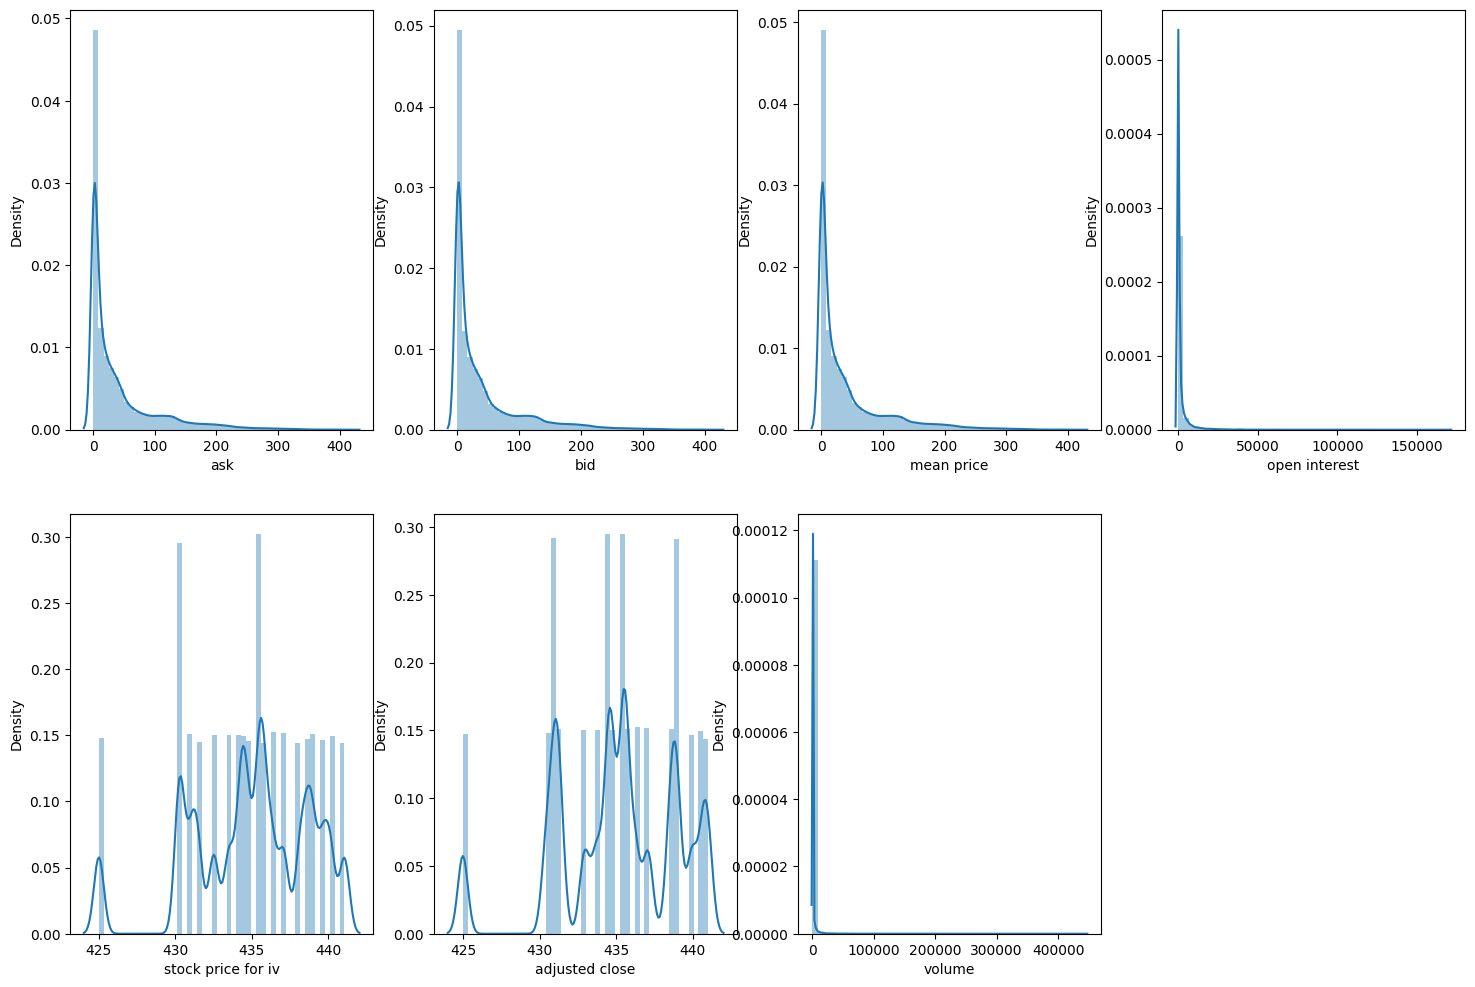

In [ ]:
# Selecting features
features = ['ask', 'bid', 'mean price', 'open interest', 'stock price for iv', 'adjusted close', 'volume']

# Plotting a Distributed plot to check skewness of features
plt.subplots(figsize=(18, 12))
for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.distplot(df[col])
plt.show()

# Only stock price for iv and adjusted close are multi-skewed
# The rest of the features are left-skewed

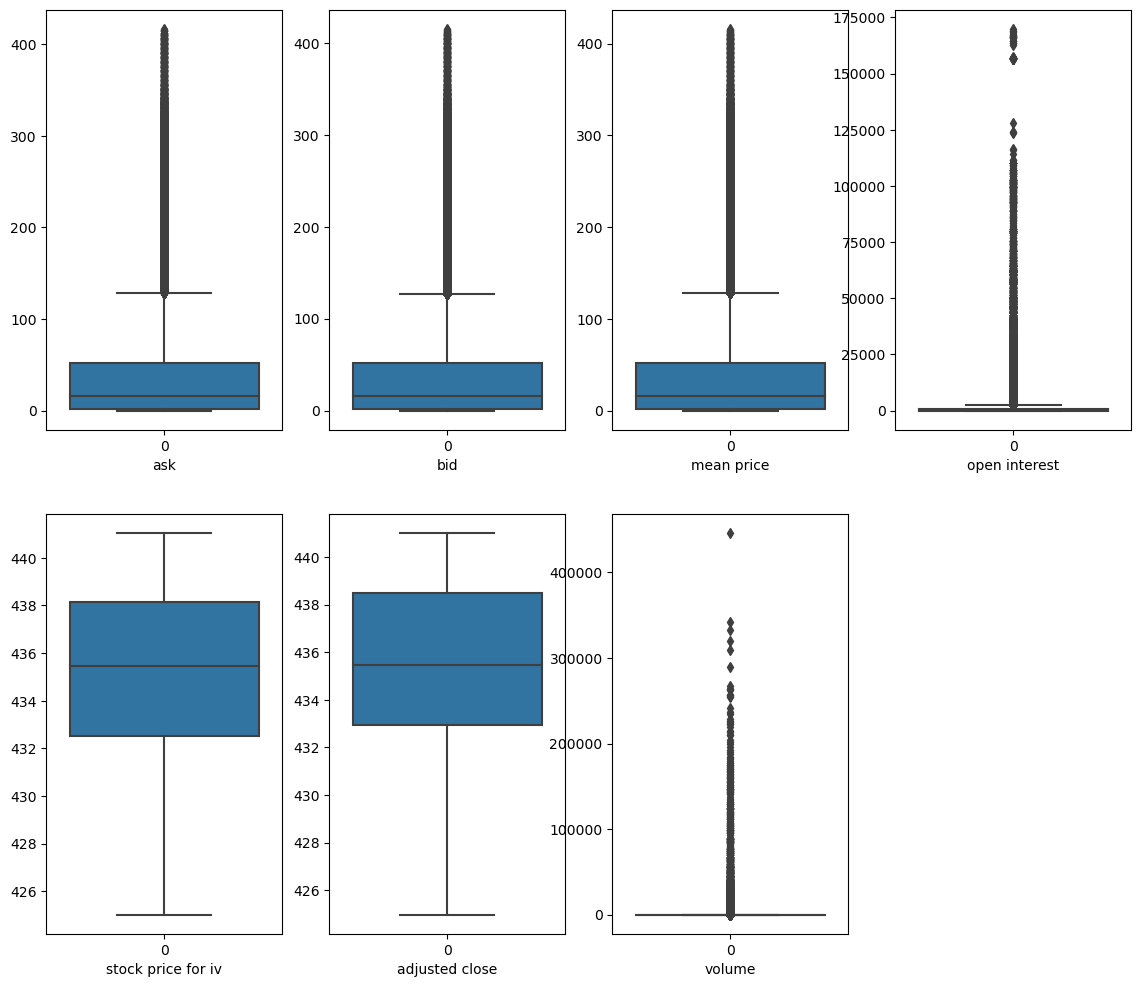

In [ ]:
# Plotting Boxplot to look for outliers
plt.subplots(figsize=(14, 12))
for i, col in enumerate(features):
    ax=plt.subplot(2, 4, i + 1)
    sns.boxplot(df[col])
    ax.set_xlabel(col)
plt.show()
# Both Open Interest and Volume have only outliers, that cannot be treated as features.

In [ ]:
# Dropping Open Interest and Volume
df = df.drop(columns=['open interest', 'volume'])
for f in features:
    if f == 'open interest':
        features.remove(f)
    elif f == 'volume':
        features.remove(f)
# There are no other outliers for given features.

# Data Aggregation and Representation

In [ ]:
# Encoding call/put column into numeric values (0,1) to make it easier to plot
df['C/P Encoded'] = ''
label = LabelEncoder()
df['C/P Encoded'] = label.fit_transform(df['call/put'])
df['C/P Encoded'] = df['C/P Encoded'] / (df['C/P Encoded'].max())
df['C/P Encoded'] = df['C/P Encoded'].astype(int)
features.append('C/P Encoded')

In [ ]:
# Splitting days to get Weeks and Weekends
df["date_new"]=pd.to_datetime(df["date_new"], errors ='coerce')
df["date_of_month"]=df["date_new"].dt.day
df['week_number_month'] = (df['date_new'].dt.day - 1) // 7 + 1
df["day_of_week"]=df['date_new'].dt.strftime("%A")
df.head()

,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,...,delta,vega,gamma,theta,rho,date_new,C/P Encoded,date_of_month,week_number_month,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
07/01/2021,430.43,12/15/2023,640.0,P,216.50,211.50,214.000,0.148310,0,0,...,-0.931634,0.672488,0.000997,-0.010467,-15.169052,2021-07-01,1,1,1,Thursday
07/01/2021,430.43,08/02/2021,390.0,P,0.92,0.87,0.895,0.228078,95,423,...,-0.068130,0.167521,0.004526,-0.059614,-0.026484,2021-07-01,1,1,1,Thursday
07/01/2021,430.43,08/02/2021,390.0,C,41.38,40.98,41.180,0.227454,0,0,...,0.932381,0.166549,0.004512,-0.060213,0.315605,2021-07-01,0,1,1,Thursday
07/01/2021,430.43,08/02/2021,389.0,P,0.88,0.84,0.860,0.230561,2,0,...,-0.065247,0.162008,0.004329,-0.058282,-0.025366,2021-07-01,1,1,1,Thursday
07/01/2021,430.43,08/02/2021,389.0,C,42.55,41.90,42.225,0.234778,0,0,...,0.931392,0.168427,0.004420,-0.062803,0.314315,2021-07-01,0,1,1,Thursday


In [ ]:
# Day Wise distribution of Adjusted Stockprice
df_2=df.groupby('day_of_week').sum()
df_2=df_2.reset_index()
df_2=df_2[['day_of_week','adjusted close']]
df_2=df_2.sort_values('adjusted close')
df_2

,day_of_week,adjusted close
1,Monday,13664757.08
3,Tuesday,18182656.36
4,Wednesday,18386055.20
2,Thursday,22761011.66
0,Friday,23180235.70


In [ ]:
# DayWise distribution of original Stock Price
df_3=df.groupby('day_of_week').sum()
df_3=df_3.reset_index()
df_3=df_3[['day_of_week','stock price for iv']]
df_3=df_3.sort_values('stock price for iv')
df_3

,day_of_week,stock price for iv
1,Monday,13665587.62
3,Tuesday,18173487.14
4,Wednesday,18387007.02
2,Thursday,22746018.02
0,Friday,23175490.96


# Data Analysis

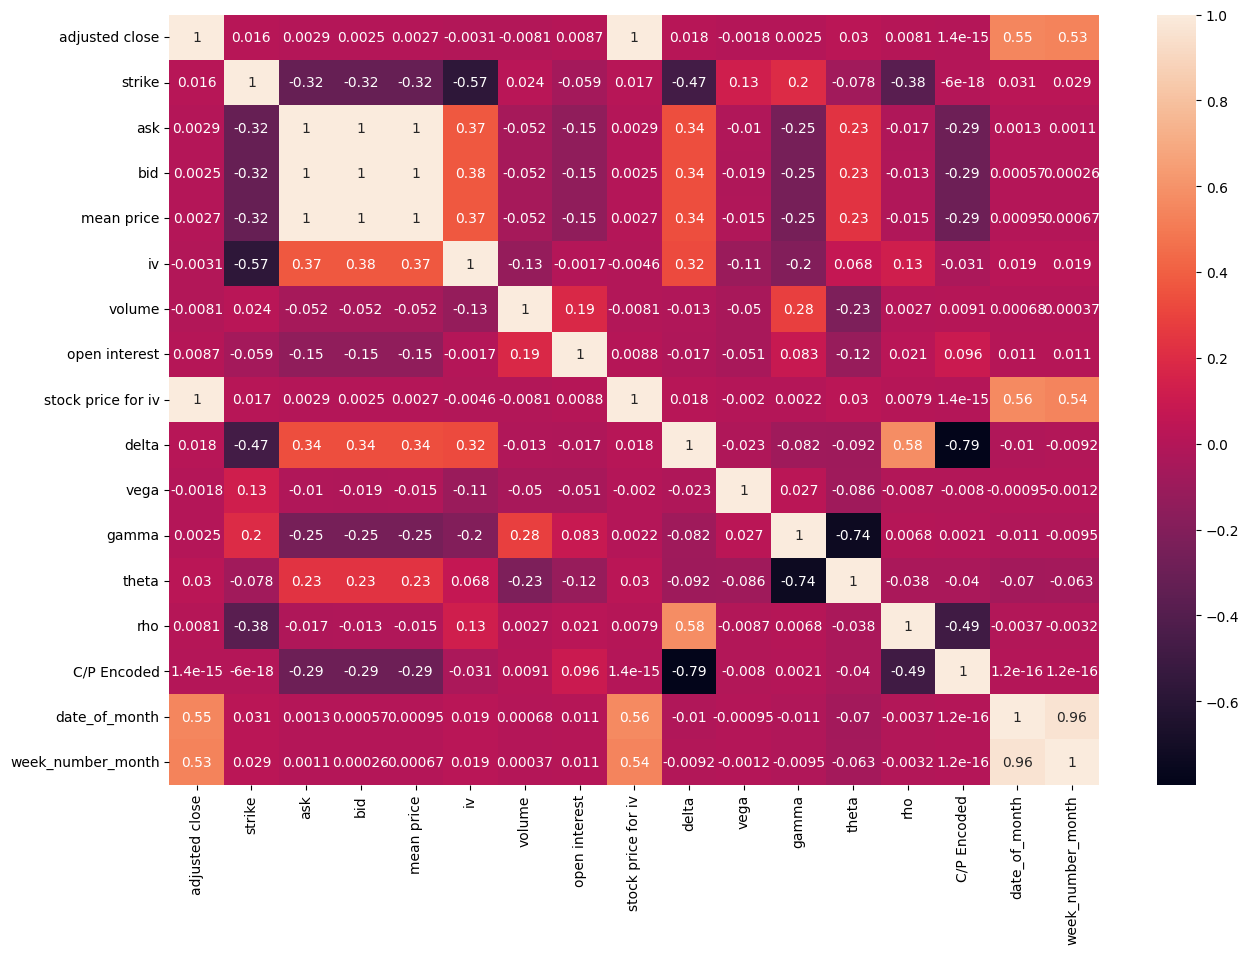

In [ ]:
# Correlation Matrix to identify the Correlation among various variables and to identify which features are useful for
# model creation
plt.figure(figsize=(15, 10))

corr_matrix = df.corr()

sns.heatmap(corr_matrix,annot=True)
plt.show()

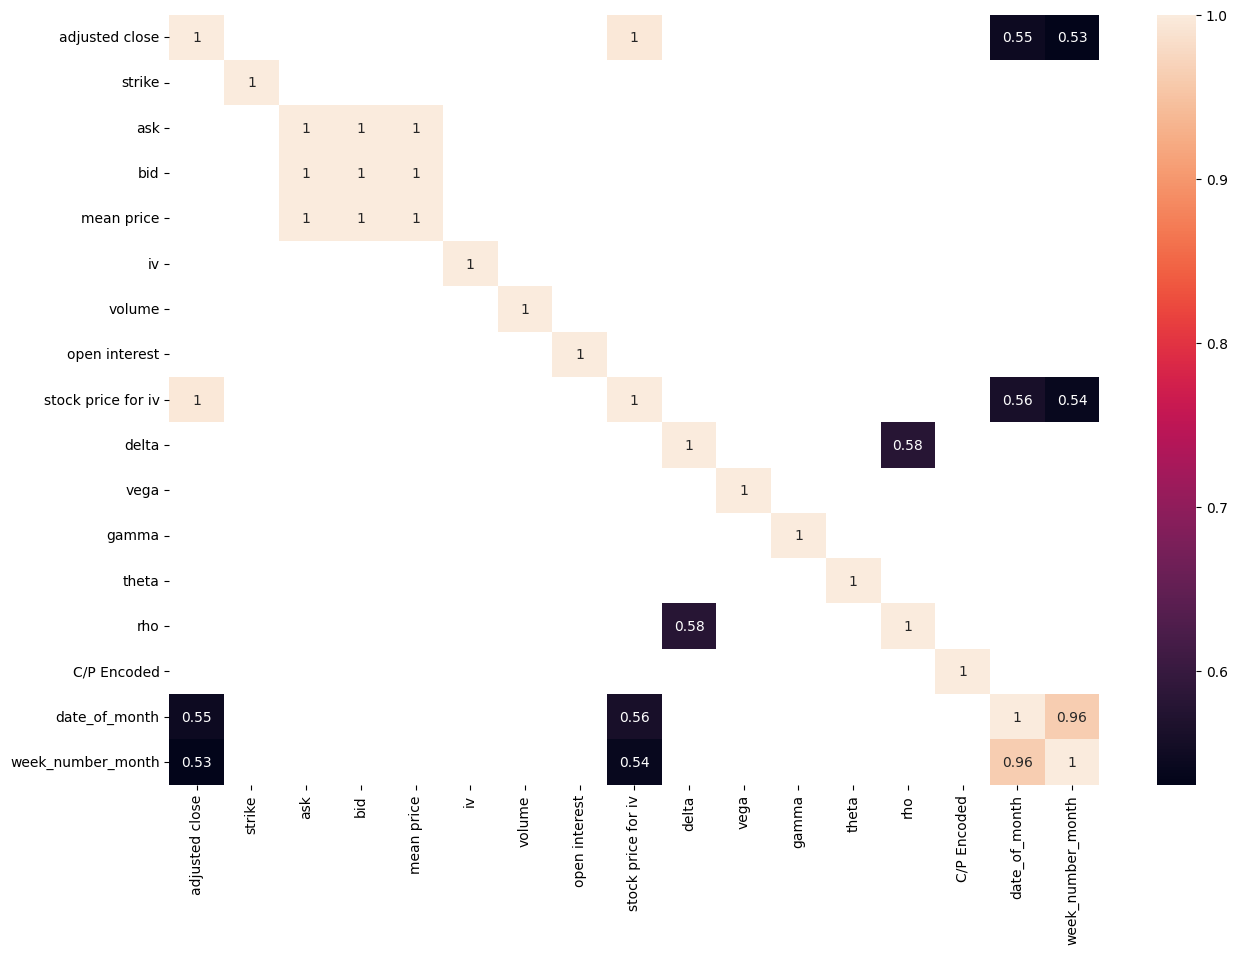

In [ ]:
# Correlation Matrix to identify the strong relationship between various features
# Correlation matrix for vlaues >0.5
plt.figure(figsize=(15, 10))
strong_pairs = corr_matrix[(corr_matrix) > 0.5]
sns.heatmap(strong_pairs,annot=True)
plt.show()

# Data Visualization

<Axes: title={'center': 'Adjusted Close Stock Price Vs Day'}, xlabel='day_of_week', ylabel='adjusted close'>

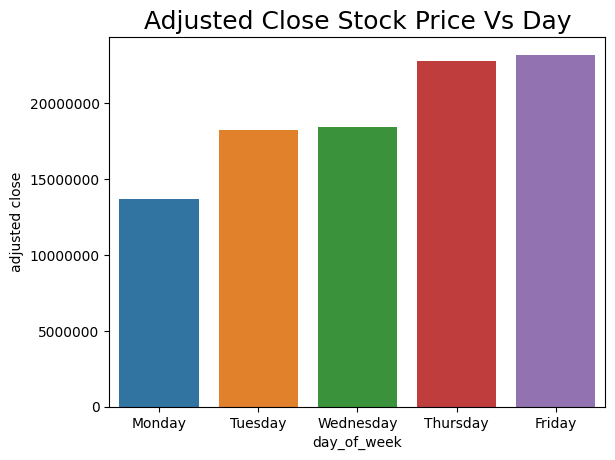

In [ ]:
# Plot to indicate the distribution of Adjusted price of stock among different days of the week
plt.ticklabel_format(style='plain', axis='y')
plt.title('Adjusted Close Stock Price Vs Day', fontsize=18)
sns.barplot(x = 'day_of_week',y = 'adjusted close',data = df_2)

<Axes: title={'center': 'Orginal Stock Price for IV Vs Day'}, xlabel='day_of_week', ylabel='stock price for iv'>

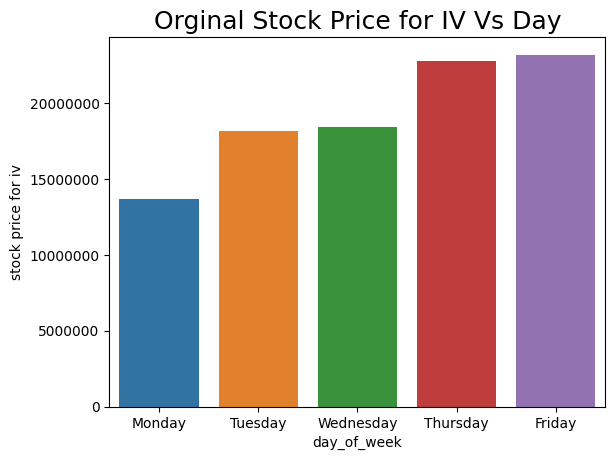

In [ ]:
# Plot to indicate the distribution of Original price of stock among different days of the week
plt.ticklabel_format(style='plain', axis='y')
plt.title('Orginal Stock Price for IV Vs Day', fontsize=18)
sns.barplot(x = 'day_of_week',y = 'stock price for iv',data = df_3)

# Utilization of Analysis Results - Model Implementation

In [ ]:
# For dropping the unnecessary features before modelling the dataset
df=df.drop(columns=['expiration','strike','mean price','call/put','delta','vega',
                   'gamma','theta','rho','C/P Encoded','date_new','day_of_week'])

df.head()

,adjusted close,ask,bid,iv,volume,open interest,stock price for iv,date_of_month,week_number_month
date,,,,,,,,,
07/01/2021,430.43,216.50,211.50,0.148310,0,0,430.26,1,1
07/01/2021,430.43,0.92,0.87,0.228078,95,423,430.26,1,1
07/01/2021,430.43,41.38,40.98,0.227454,0,0,430.26,1,1
07/01/2021,430.43,0.88,0.84,0.230561,2,0,430.26,1,1
07/01/2021,430.43,42.55,41.90,0.234778,0,0,430.26,1,1


In [ ]:
# Dividing the data into Test and Train data set
def create_train_test_set(df):
    feature = df.drop(columns=['adjusted close'], axis=1)
    target = df['adjusted close']

    data_len = df.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = feature[:train_split], feature[train_split:val_split], feature[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df)

Historical Stock Data length is -  221046
Training Set length -  194520
Validation Set length -  22104
Test Set length -  4420
(194520, 8) (22104, 8) (4422, 8)
(194520,) (22104,) (4422,)


In [ ]:
# Model fitting using Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 1.09014862e-02 -1.10751362e-02  3.02045620e-02  4.39081373e-07
  4.73677009e-08  1.01280449e+00 -3.98358662e-02  2.49806627e-01]
LR Intercept: 
 -5.4815768876024435


In [ ]:
# For checking the overall peroformance of the model
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9934854520312011


In [ ]:
# Finding the Mean Square Error

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
# Measuring the various metrics to analyse the performance of the model

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.99
Training Explained Variation:  0.99
Training MAPE: 0.05
Training Mean Squared Error: 0.09
Training RMSE:  0.3
Training MAE:  0.22
 
Validation R-squared:  0.84
Validation Explained Variation:  0.84
Validation MAPE: 0.08
Validation Mean Squared Error: 0.09
Validation RMSE:  0.41
Validation MAE:  0.36
 
Test R-squared:  -1.5272527858654734e+25
Test Explained Variation:  -6.46254617564081e+21
Test MAPE: 0.15
Test Mean Squared Error: 0.44
Test RMSE:  0.67
Test MAE:  0.67


In [ ]:
# Predicting the values of the Test Data
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'date'] = pd.to_datetime(df_pred['date'],format='%m/%d/%Y')
df_pred

,date,Actual,Predicted
0,2021-07-28,438.83,438.643930
1,2021-07-28,438.83,438.641940
2,2021-07-28,438.83,438.644014
3,2021-07-28,438.83,438.641958
4,2021-07-28,438.83,438.644392
...,...,...,...
22099,2021-07-30,438.51,439.172161
22100,2021-07-30,438.51,439.172483
22101,2021-07-30,438.51,439.172030
22102,2021-07-30,438.51,439.171030


Text(0.5, 1.0, 'Actual Vs Predicted (Adjusted Stock Price)')

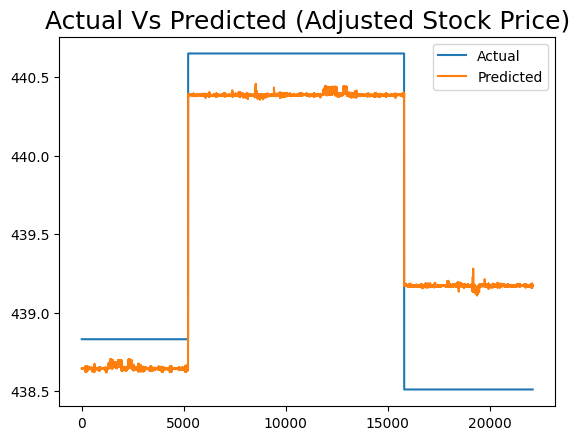

In [ ]:
# Plotting Actual Vs Predicted data after modelling
df_pred[['Actual', 'Predicted']].plot()
plt.title('Actual Vs Predicted (Adjusted Stock Price)', fontsize=18)

In [ ]:
# Storing the predicted data in a excel
df_pred.to_excel(r'D:\PyCharm Projects\CBD Activity\Activity2\StockarketPricePrediction\Actual_and_Predicted_Data.xlsx',index=False)

# Feature Engineering

In [ ]:
dfNew = pd.read_csv("/content/sample_data/data_download 1Jul2021_to_30Jul2021.csv")

In [ ]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  int64  
 15  stock price for iv  221046 non-nul

In [ ]:
dfNew.describe

<bound method NDFrame.describe of        symbol  exchange        date  adjusted close          option symbol  \
0         SPY  NYSEArca  07/30/2021          438.51  SPY   210730C00215000   
1         SPY  NYSEArca  07/30/2021          438.51  SPY   210730P00215000   
2         SPY  NYSEArca  07/30/2021          438.51  SPY   210730C00220000   
3         SPY  NYSEArca  07/30/2021          438.51  SPY   210730P00220000   
4         SPY  NYSEArca  07/30/2021          438.51  SPY   210730C00225000   
...       ...       ...         ...             ...                    ...   
221041    SPY  NYSEArca  07/01/2021          430.43  SPY   231215P00630000   
221042    SPY  NYSEArca  07/01/2021          430.43  SPY   231215C00635000   
221043    SPY  NYSEArca  07/01/2021          430.43  SPY   231215P00635000   
221044    SPY  NYSEArca  07/01/2021          430.43  SPY   231215C00640000   
221045    SPY  NYSEArca  07/01/2021          430.43  SPY   231215P00640000   

        expiration  strike ca

#Visualize Adjusted Closing price

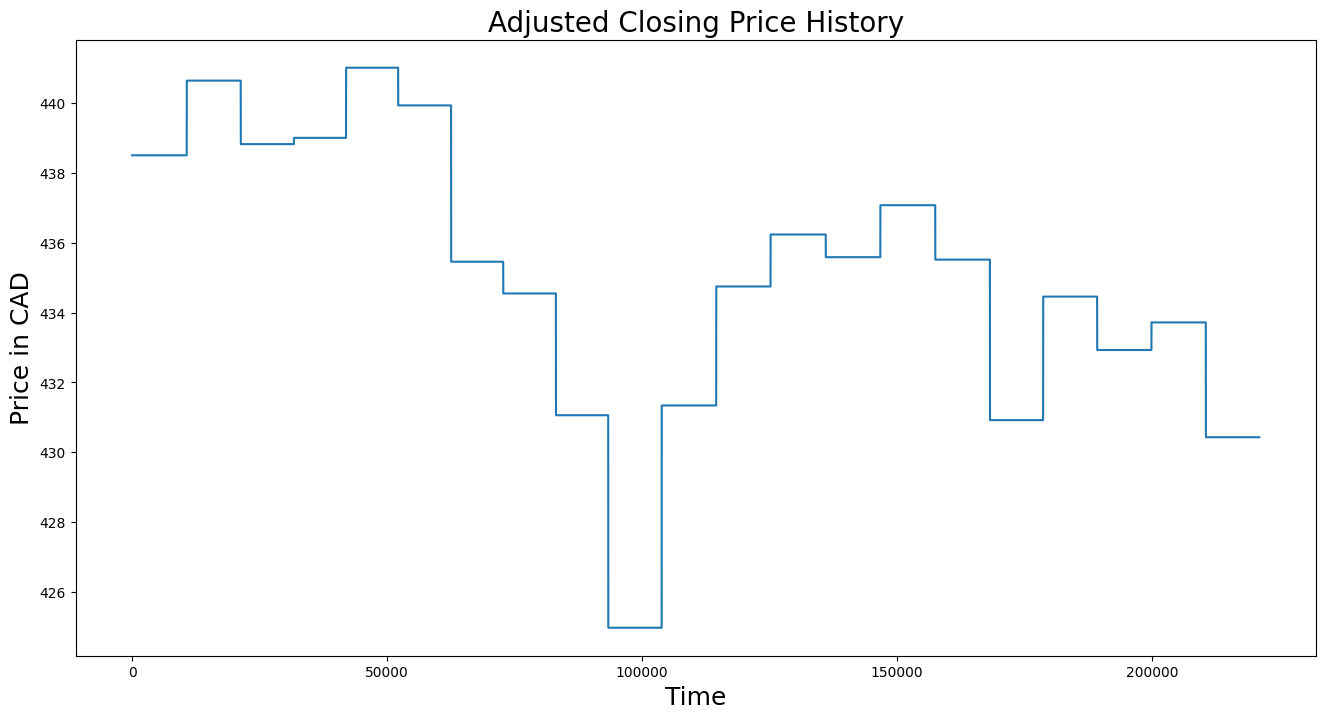

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Adjusted Closing Price History', fontsize =20)
plt.plot(dfNew['adjusted close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Price in CAD', fontsize =18)
plt.show()

In [ ]:
#Creating a dataset which contains only Adjusted close column
data = dfNew.filter(['adjusted close']) # This will filter the other columns
# Convert the data set to numpy array
dataset = data.values
# Get number of rows to train the model
trainingDataLen = math.ceil(len(dataset)*0.8) # Considering only 80% of the data

trainingDataLen



176837

In [ ]:
# Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(dataset)

scaledData


array([[0.84361371],
       [0.84361371],
       [0.84361371],
       ...,
       [0.34018692],
       [0.34018692],
       [0.34018692]])

In [ ]:
len(scaledData)

221046

In [ ]:
# Creating a training Data Set
# Create the scaled training Data Set

trainData = scaledData[0:]